<a href="https://colab.research.google.com/github/sandip01234/MachineLearning/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans



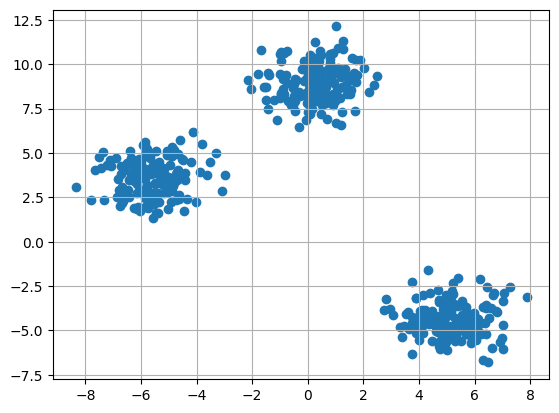

In [4]:
x,y = make_blobs(n_samples=500, n_features=2, centers=3,  random_state=23)
fig = plt.figure(0)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [6]:
k=3
clusters={}
np.random.seed(13)
for idx in range(k):
    center = 2*(2*np.random.random((x.shape[1],))-1)
    points =[]
    cluster ={
        'center': center,
        'points': points
    }
    clusters[idx] = cluster

clusters


{0: {'center': array([ 1.11080964, -1.04983512]), 'points': []},
 1: {'center': array([1.29711413, 1.86299679]), 'points': []},
 2: {'center': array([ 1.89040446, -0.18620301]), 'points': []}}

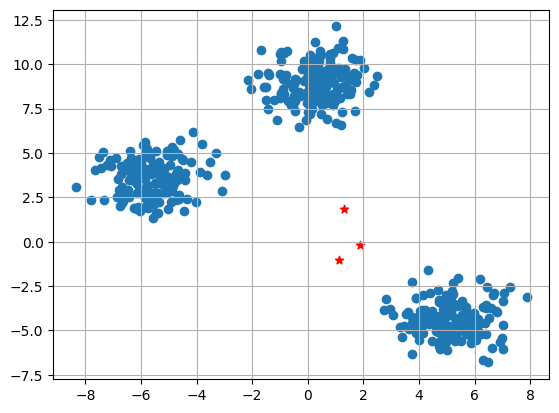

In [8]:
#plot the random intialize center with data points
plt.scatter(x[:,0],x[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='*',color='red')
plt.show()



In [9]:
def distance(p1,p2):
  return np.sqrt(np.sum((p1-p2)**2))


In [23]:
#create a function to Assign and Update the cluster center

def assign_clusters(x,clusters):
  for idx in range(x.shape[0]):
    dist=[]
    curr_x = x[idx]
    for i in range(k):
      dis = distance(curr_x,clusters[i]['center'])
      dist.append(dis)
      curr_cluster = np.argmin(dist)
    clusters[curr_cluster]['points'].append(curr_x)
  return clusters

def update_clusters(x,clusters):
    for i in range(k):
      points = np.array(clusters[i]['points'])
      if points.shape[0] >0:
        new_center = np.mean(points,axis=0)
        clusters[i]['center'] = new_center
        clusters[i]['points'] = []
    return clusters


In [28]:
def pred_cluster(x, clusters):
  pred = []
  for i in range(x.shape[0]):
    dist = []
    for j in range(k):
      dist.append(distance(x[i], clusters[j]['center']))
    # Append the cluster index with the minimum distance for the current data point
    pred.append(np.argmin(dist))
  return pred

In [29]:
#assign,update and predict the cluster center

clusters = assign_clusters(x,clusters)
clusters = update_clusters(x,clusters)
pred = pred_cluster(x,clusters)


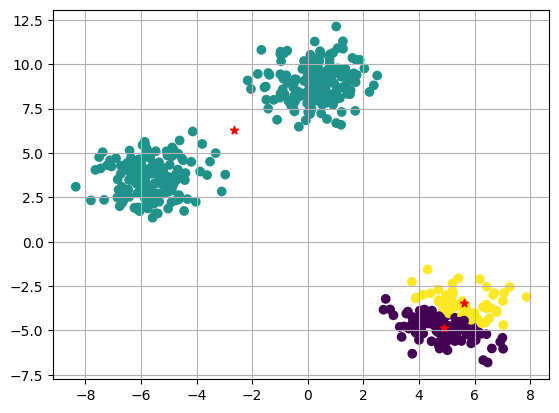

In [30]:
#plot the data points with their predicted cluster center
plt.scatter(x[:,0],x[:,1],c=pred)
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],marker='*',color='red')
plt.show()